## Deep learning approach

### LSTM

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('ProductSalesData.csv')

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

In [4]:
df = data[['Units Sold']]

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

In [6]:
def create_dataset(data, ts=1):
    X, Y = [], []
    for i in range(len(data) - ts - 1):
        a = data[i:(i + ts), 0]
        X.append(a)
        Y.append(data[i + ts, 0])
    return np.array(X), np.array(Y)

In [7]:
ts = 3
X, Y = create_dataset(df_scaled, ts)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(ts, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
63/63 [==============================] - 4s 18ms/step - loss: 0.0466 - val_loss: 0.0308
Epoch 2/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0302 - val_loss: 0.0289
Epoch 3/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0300 - val_loss: 0.0289
Epoch 4/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0297 - val_loss: 0.0288
Epoch 5/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0297 - val_loss: 0.0287
Epoch 6/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0298 - val_loss: 0.0288
Epoch 7/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0300 - val_loss: 0.0289
Epoch 8/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0297 - val_loss: 0.0285
Epoch 9/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0296 - val_loss: 0.0285
Epoch 10/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0295 - val_loss: 0.0286
Epoch 11

63/63 [==============================] - 0s 6ms/step - loss: 0.0295 - val_loss: 0.0285
Epoch 84/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0295 - val_loss: 0.0286
Epoch 85/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0294 - val_loss: 0.0288
Epoch 86/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0296 - val_loss: 0.0284
Epoch 87/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0294 - val_loss: 0.0284
Epoch 88/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0295 - val_loss: 0.0284
Epoch 89/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0295 - val_loss: 0.0284
Epoch 90/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0294 - val_loss: 0.0284
Epoch 91/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0295 - val_loss: 0.0286
Epoch 92/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0294 - val_loss: 0.0286
Epoch 93/100


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [16]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [17]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [25]:
test_predict

array([[194.84602],
       [501.15582],
       [289.13095],
       ...,
       [420.15256],
       [502.0417 ],
       [303.7021 ]], dtype=float32)

In [18]:
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")


Train RMSE: 346.6493006673652, Test RMSE: 341.3032681988748


In [19]:
train_predict_plot = np.empty_like(df_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[ts:len(train_predict)+ts, :] = train_predict

In [20]:
test_predict_plot = np.empty_like(df_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(ts):len(df_scaled)-1, :] = test_predict

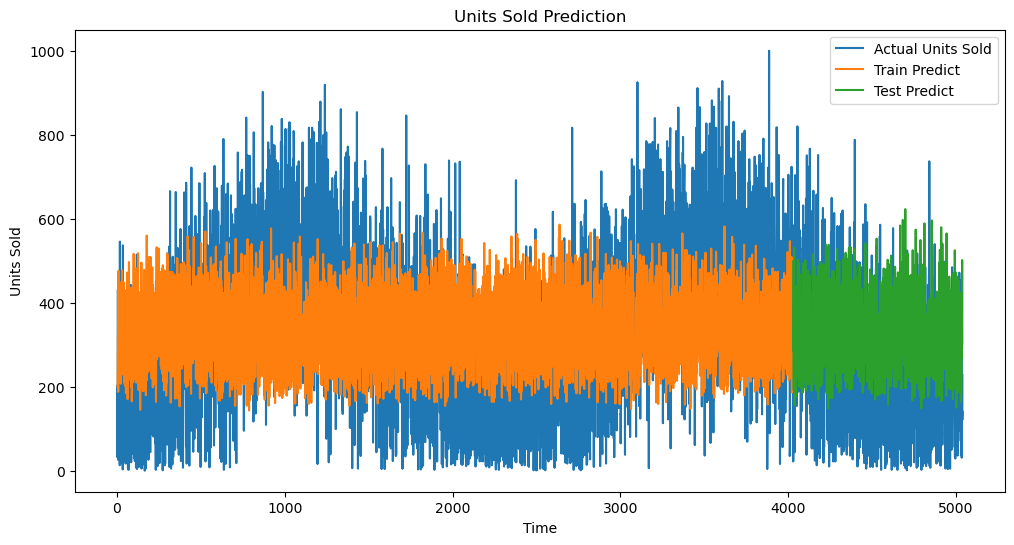

In [21]:
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(df_scaled), label='Actual Units Sold')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.title('Units Sold Prediction')
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.legend()
plt.show()